<a href="https://colab.research.google.com/github/tracieschroeder/Participant-Notebooks/blob/main/Astro_Notebook_Star_catalogueTEACHER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Naked Eye Star Properties from a Big Data Set
Your tasks are to:  
- use Python to download and analyze a file
- investigate what properties of a star are helpful to astronomers
- analyze a huge collection of Hipparcos, Yale Bright Star, and Gliese catalogues
- use code to calculate other useful quantities, create filters, etc

### Helpful resources  
- This notebook already has some helpful code, but you may need to copy some code from earlier notebooks and/or use other resources to help make progress.  
- To read a csv file hosted on GitHub, navigate to that file and copy the link from the "download" button (right-click and copy link).  


#Part 0: Introduction

In order to start our work, we will need to import modules and read/inspect our data.

In [ ]:
# Import modules
# You will at least need pandas, numpy, matplotlib, and pyplot
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
# Read in data that will be used for the calculations.
# Get the "stars.csv" in the "data" folder at https://raw.githubusercontent.com/skmay-physics/codingresources/main/stars.csv
data = pd.read_csv("https://raw.githubusercontent.com/skmay-physics/codingresources/main/stars.csv")

In [ ]:
# We wish to look at the first 5 rows of our data set. The command for .head is a good way to give this information.
data.head(5)

,proper,ra,dec,dist,mag,absmag,ci,temp,x,y,z,con,lum,var,var_min,var_max
0,Sol,0.000000,0.000000,0.0000,-26.70,4.850,0.656,5756.588113,0.000005,0.000000,0.000000,NaN,1.000000,NaN,NaN,NaN
1,Proxima Centauri,14.495985,-62.679485,1.2959,11.01,15.447,1.807,3383.441193,-0.472264,-0.361451,-1.151219,Cen,0.000058,V645,11.079,10.939
2,Rigil Kentaurus,14.660765,-60.833976,1.3248,-0.01,4.379,0.710,5567.728737,-0.495203,-0.414084,-1.156625,Cen,1.543121,NaN,0.113,-0.087
3,NaN,14.660346,-60.838300,1.3248,1.35,5.739,0.900,4996.415833,-0.495181,-0.413973,-1.156674,Cen,0.440961,NaN,NaN,NaN
4,Barnard's Star,17.963472,4.693388,1.8238,9.54,13.235,1.570,3691.168543,-0.017373,-1.816613,0.149123,Oph,0.000443,V2500,9.590,9.490


In [ ]:
# The .shape command displays the (number of rows , number of columns) in a file.
data.shape

(119614, 16)

In [ ]:
# To get the information on one star of interest, we can use the dataloc command
# modify the code to retrieve the information for Polaris
data.loc[data['proper'] == 'Polaris']

,proper,ra,dec,dist,mag,absmag,ci,temp,x,y,z,con,lum,var,var_min,var_max
35939,Polaris,2.52975,89.264109,132.626,1.97,-3.643,0.636,5830.070651,1.3431,1.047629,132.614909,UMi,2495.743795,Alp,1.993,1.953


#Part 1: Magnitude Basics

This file contains a lot of data! There are lots of ways it might be useful for us, but it's unlikely we will be able to (or even want to) read each point one by one.  

At this point in our astronomy studies, it is likely that some (or maybe even most) of this data is not meaningful.  Different situations might make different ways of sorting more or less interesting.  But let's try to develop some sense of that these quantities mean by making some graphs and doing some research.


In [ ]:
#sorting data table according to a column
#sort the data by magnitude (mag in this data).

data.sort_values("mag") #returns our data set sorted by magnitude


,proper,ra,dec,dist,mag,absmag,ci,temp,x,y,z,con,lum,var,var_min,var_max
0,Sol,0.000000,0.000000,0.0000,-26.70,4.850,0.656,5756.588113,0.000005,0.000000,0.000000,NaN,1.000000,NaN,NaN,NaN
10,Sirius,6.752481,-16.716116,2.6371,-1.44,1.454,0.009,10014.343360,-0.494323,2.476731,-0.758485,CMa,22.824433,NaN,-1.333,-1.523
22831,Canopus,6.399195,-52.695660,94.7867,-0.62,-5.504,0.164,8452.510597,-5.992679,57.132034,-75.396105,Car,13854.791680,NaN,-0.547,-0.667
459,Arcturus,14.261030,19.182410,11.2575,-0.05,-0.307,1.239,4233.601330,-8.823448,-5.932531,3.698938,Boo,115.557996,NaN,NaN,NaN
2,Rigil Kentaurus,14.660765,-60.833976,1.3248,-0.01,4.379,0.710,5567.728737,-0.495203,-0.414084,-1.156625,Cen,1.543121,NaN,0.113,-0.087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015,NaN,11.887989,-7.375136,20.5634,19.40,17.835,NaN,NaN,-20.384510,0.597944,-2.639625,NaN,0.000006,NaN,NaN,NaN
817,NaN,11.363683,-13.218445,14.2450,19.57,18.802,NaN,NaN,-13.677072,2.299785,-3.257674,NaN,0.000003,NaN,NaN,NaN
382,NaN,14.478657,33.176703,10.5263,19.74,19.629,NaN,NaN,-7.018974,-5.323617,5.759645,NaN,0.000001,NaN,NaN,NaN
920,NaN,17.833107,22.683357,14.8810,20.10,19.237,NaN,NaN,-0.599918,-13.716844,5.738679,NaN,0.000002,NaN,NaN,NaN


Does this give any hint what magnitude might correspond to?  What can you conclude about how Astronomers define magnitude?

Now rewrite the code above to sort by other columns.  Try distance, temperature, ci (color index).  What do you learn?

In [ ]:
#some of the data is incomplete.  We will want to ignore the data with no known value for some quantities.
# In this case, when distance is unknown, the data table uses 100000.0000.  We will replace these values with NaN.

data['dist'] = data['dist'].replace(100000.0000, np.nan) # Python uses the code data.replace to change values in a data set.

#we can remove those values
data = data.dropna(subset=['dist']) #data.dropna drops specified values.

data.shape

(109399, 16)

Text(0, 0.5, 'number of stars')

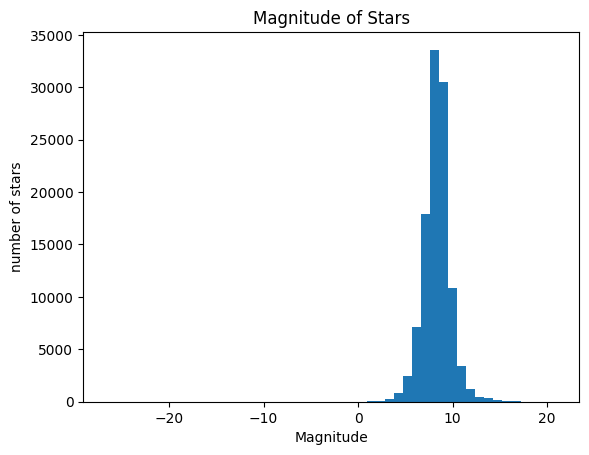

In [ ]:
#How many stars at each magnitude?
plt.hist(data['mag'],bins=50)
plt.title("Magnitude of Stars")
plt.xlabel("Magnitude")
plt.ylabel("number of stars")

Text(0, 0.5, 'number of stars')

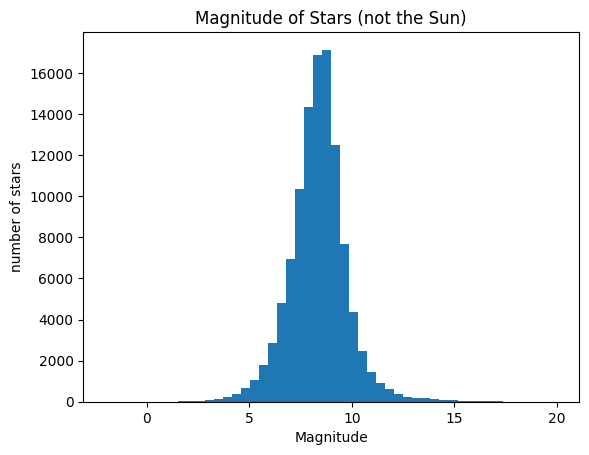

In [ ]:
#because the Sun is so bright, the x axis on this histogram is skewed for the non-local stars.
#Changing the axes will make it easier to think about how many stars at each magnitude?
plt.hist(data['mag'],bins=50, range=[-2,20]) #add a range to cut our view of the data
plt.title("Magnitude of Stars (not the Sun)")
plt.xlabel("Magnitude")
plt.ylabel("number of stars")

**Some Questions to Consider, Part 1**
1. Is this an accurate depiction of all stars in the universe?
2. Why does this distribution have the shape it does?  (That is, why are there fewer very bright and very dim stars?)
3. With very dark skies, we can see stars down to magnitude 5 or 6.  Change the parameters in your histogram to show only the stars visible with the naked eye.  Does this histogram have the shape you'd expect?

#Part 2: What does Magnitude Depend on?
Now that we have some sense of what Magnitude is, it's reasonable to ask what physical factors determine what it is.  Let's make some graphs and see if we can gain some insight.

- See the documentation on [Pyplot's scatterplot function](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.scatter.html) for more details.
- When plotting a large number of data points, it can help to specify the size (s) and transparency (alpha) of the points and remove the line around the markers. That might look like this:
plt.scatter(x,y, s=1, alpha=.5, edgecolors='none').  
Experiment with different values of s, alpha, and edgecolor to see what combination best displays your data.

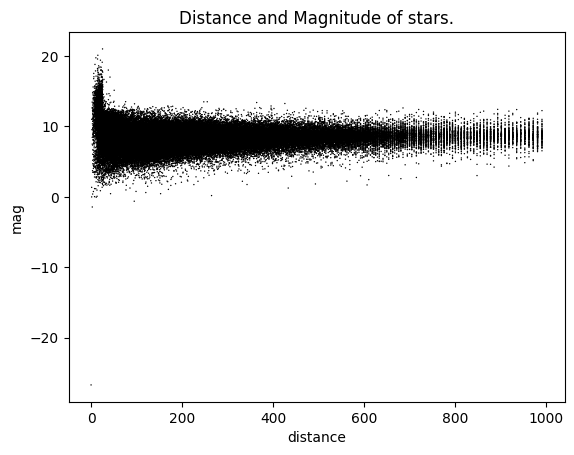

In [ ]:
#Python lets us make scatter plots with the data set.  Because there are so many data in the set, it will be helpful to set the points to be small (s=1)
plt.scatter(data['dist'],data['mag'],s=1,alpha=1, edgecolors='none', color='black')
plt.xlabel('distance')
plt.ylabel('mag')
plt.title('Distance and Magnitude of stars.')
plt.grid(False)
plt.show()

Take a look at this graph.  What can you conclude?
- Where are the very dim stars located in space?  Why might that be?
- Can you detect any trend in the data?  That is, is there a relationship between distance and magnitude?  State that explicitly.

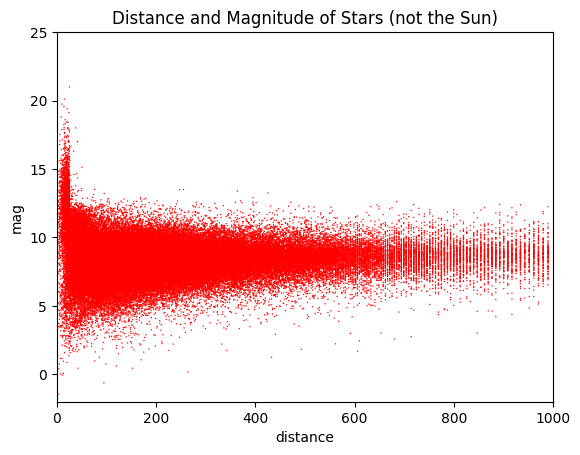

In [ ]:
plt.scatter(data['dist'],data['mag'],s=1,alpha=1, edgecolors='none', color='red')
plt.xlabel('distance')
plt.ylabel('mag')
plt.title('Distance and Magnitude of Stars (not the Sun)')
plt.grid(False)
plt.axis([0,1000,-2,25]) #changing the range to eliminate the sun
plt.show()

Is there a trend here? Let's try fitting a best fit line.
Before we do, let's consider using a smaller set of data.  What set of stars would have the fewest selection effects?

In [ ]:
#define a subset of the data to plot
plotdata = data.query('dist < 10') #closer stars only
plotdata.shape


(323, 16)

0.4484448516178857 7.019243421382129


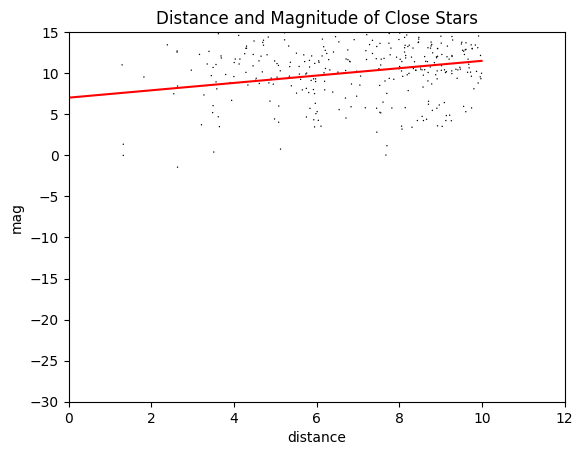

In [ ]:
# Fit a line to the data
# specifying the degree of the polynomial fit to be 1 makes it a linear fit.
m, b = np.polyfit(plotdata['dist'], plotdata['mag'], 1)

# Create a sequence of x values spanning the range of 'the distance values'
x = np.linspace(plotdata['dist'].min(), plotdata['dist'].max(), 100)

# Calculate the corresponding y values for the fitted line
y = m * x + b

#make the graph again
plt.scatter(plotdata['dist'],plotdata['mag'],s=1,alpha=1, edgecolors='none', color='black')
plt.plot(x,y,color='red')
plt.xlabel('distance')
plt.ylabel('mag')
plt.title('Distance and Magnitude of Close Stars')
plt.grid(False)
plt.axis([0,12,-30,15])
print (m,b)
plt.show()

**Some Questions to Consider, Part 2**

In addition to distance, it should make sense to you that magnitude depends on some *intrinsic* properties of the star.
- What do we mean by intrinsic properties? List a few intrinsic star properties.
- Which factors will affect brightness?  Make some graphs to see if you are correct.




#Part 3: Absolute Magnitude

As we have seen, magnitude is specific to the observer and not dependent (exclusively) on the intrinsic properties of the star. In order to remove the affect of distance and come up with a metric that describes only the inherent brightness of the star, we define *absolute magnitude*.

**Absolute Magnitude** is the magnitude a star would have if it were 10 parsecs away from Earth.  That is, it puts all stars on equal footing with regards to distane and allows us to compare apples to apples.

Using the data table and sorts we have already done, determine the absolute magnitude of the Sun.  How does this compare to other stars in our list?  To answer this, we might want to make another histogram.

Text(8, 8000, 'Sun')

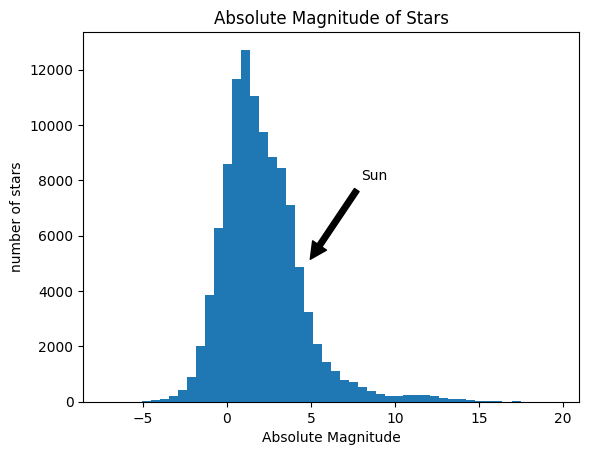

In [ ]:
#make histogram of absolute magnitude data
plt.hist(data['absmag'],bins=50)
plt.title("Absolute Magnitude of Stars")
plt.xlabel("Absolute Magnitude")
plt.ylabel("number of stars")
plt.annotate("Sun", xy=(4.8, 5000), xytext=(8, 8000), arrowprops=dict(facecolor='black', shrink=0.05)) #adds an annotation for the Sun

- Using the results from our histogram, explain why some might describe our beloved Sun as "average."

Let's investigate a few questions about absolute magnitude by making some plots.

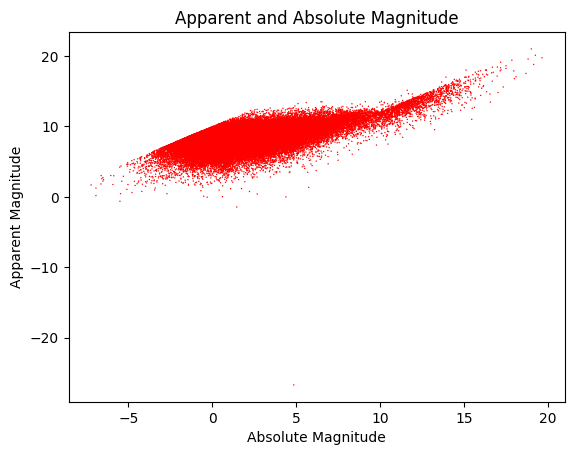

In [ ]:
#what is the relationship between absolute magnitude and apparent magnitude?
plt.scatter(data['absmag'],data['mag'],s=1,alpha=1, edgecolors='none', color='red')
plt.xlabel('Absolute Magnitude')
plt.ylabel('Apparent Magnitude')
plt.title('Apparent and Absolute Magnitude')
plt.grid(False)
plt.show()

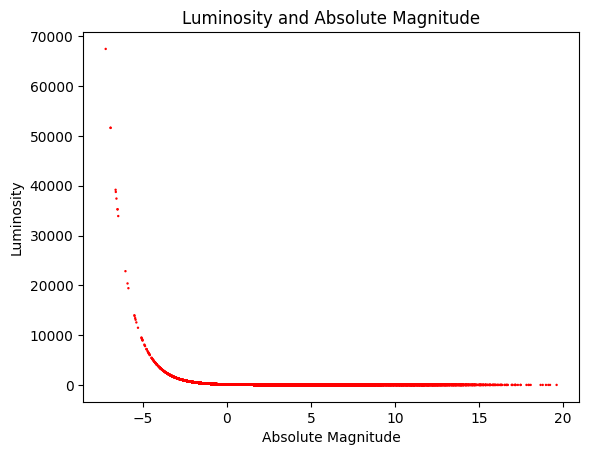

In [ ]:
#what about absolute magnitude and luminosity?
plt.scatter(data['absmag'],data['lum'],s=3,alpha=1, edgecolors='none', color='red')
plt.xlabel('Absolute Magnitude')
plt.ylabel('Luminosity')
plt.title('Luminosity and Absolute Magnitude')
plt.grid(False)
plt.show()

**Some Questions to Consider, Part 3**
- Using these plots, what can we conclude about *luminosity*?
- What role does *temperature* play in the brightness of a star?
- What other factors (not in the data set) might be important?

#Part 4: Constellations and Star Separations

It is human nature to seek patterns.  Every culture throughout human history has looked to the stars and seen their stories reflected and honored in the patterns of the brightest stars.

Because systems of power have privileged the cultural traditions that made it to Europe, the International Astronmers Union (IAU) has adopted 88 official constellations that are largely informed by star names from the Middle East and constellations from Europe (lots of Greek mythology!).  

You can find a list of the 88 "official" constellations along with their abbreviations (used in our data set) [here](https://skyandtelescope.org/astronomy-resources/constellation-names-and-abbreviations/).

In [ ]:
#we can select the stars in a particular constellation
Orion = data[(data['con'] == 'Ori')]
Orion.shape

(1790, 16)

In [ ]:
#if we want only the bright stars, we can have another cut
brightOri = Orion[(Orion['mag'] < 5)]
brightOri.shape

(49, 16)

In [ ]:
#or maybe only the named stars
namedOri= Orion[Orion['proper'].notnull()]
namedOri.shape

(8, 16)

In [ ]:
#that's a more manageable number of stars! Do we recognize any of their (IAU) names?
print(namedOri)

            proper        ra       dec      dist   mag  absmag     ci  \
17005    Bellatrix  5.418851  6.349702   77.3994  1.64  -2.804 -0.224   
42575   Betelgeuse  5.919529  7.407063  152.6718  0.45  -5.469  1.500   
55819        Saiph  5.795941 -9.669605  198.4127  2.07  -4.418 -0.168   
59435      Mintaka  5.533445 -0.299092  212.3142  2.25  -4.385 -0.175   
62798      Alnitak  5.679313 -1.942572  225.7336  1.74  -5.028 -0.199   
71263        Rigel  5.242298 -8.201640  264.5503  0.18  -6.933 -0.030   
102356     Alnilam  5.603559 -1.201920  606.0606  1.69  -7.223 -0.184   
105370      Hatsya  5.590551 -5.909901  714.2857  2.75  -6.519 -0.210   

                temp          x           y          z  con           lum  \
17005   14192.406080  11.658576   76.036136   8.560120  Ori   1152.391377   
42575    3793.506494   3.189296  151.364387  19.682142  Ori  13415.287980   
55819   12859.619950  10.444137  195.314937 -33.326707  Ori   5095.654806   
59435   13010.740360  25.868117  2

<Figure size 640x480 with 0 Axes>

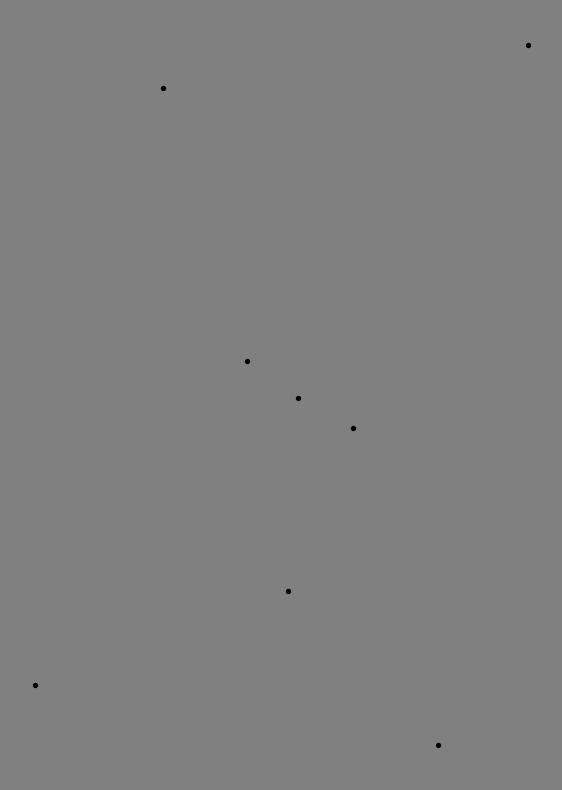

In [ ]:
#to see the pattern, we will need to use another tool
import geopandas as gpd #a tool for plotting coordinates
fig = plt.figure(facecolor='gray')
fig, ax = plt.subplots(figsize=(7,10)) #this will need to be adjusted to give the approximate proportions of the constellation
plt.axis('off')
x = namedOri['ra']
y = namedOri['dec']
ax.scatter(x,y, s=8, color='black')    # this adds the scatter points
fig.patch.set_facecolor('gray')
fig.patch.set_edgecolor('gray')

This should result in a recognizable pattern.

**Questions to Consider, Part 4**
1. Try the above for different constellation patterns.  Which are recognizable?  
2.  Which constellations are visible where we are?
3.  Learning constellations can help with navigation and communication of astronomical phenomena.  Why might we need other tools to help us talk to other scientists and find our way?

#Part 5: Right Ascension and Declination

Just as we can identify points on the Earth with their latitude and longitude, points on the celestial sphere can be identified with Right Ascension (RA) and Declination (dec).

Do some research or consult your notes to determine the answer to these questions.
1. The reference line for latitude on the Earth is the equator.  What is the reference line for declination?
2. Latitude is measured in degrees, with values going from 90 degrees South latitude at the south pole, 0 degrees at the equator, and 90 degrees North latitude at the north pole.  What units are declination measured in?  What are the values of declination at any "special" points or lines?
3. The reference line for longitude is the Prime Meridian, which runs from one pole to the other passing through Greenwich, England, France, Spain, Algeria, Mali, Burkina Faso, Togo, and Ghana.  What is the reference line for Right Ascension?
4. Longitude is measured in degrees, with values going from 180 degrees east of the Prime Meridian to 180 degrees West of the Prime Meridian. What units do astronomers use for RA?  What are the values of RA at any "special" points or lines?
5. Why are these quantities measured in angles and not in some other unit of distance?  




In [ ]:
#choose a constellation you know is visible at our location.
#create a file with the stars in that constellation (see above for examples), then sort by RA and declination
#make note of the range of ra and dec values for each constellation you consider
Aquarius = data[(data['con'] == 'Aqr')] #choosing Aquarius, which is not a good choice
Aquarius.sort_values(by='ra') #sorting by ra first

,proper,ra,dec,dist,mag,absmag,ci,temp,x,y,z,con,lum,var,var_min,var_max
42161,NaN,20.643531,-0.081267,151.5152,9.17,3.268,0.495,6411.652779,96.687203,-116.655022,-0.214906,Aqr,4.293387,NaN,NaN,NaN
21999,NaN,20.649239,-8.399356,92.3361,7.74,2.913,0.369,7049.740446,58.396003,-70.242037,-13.487710,Aqr,5.953879,NaN,NaN,NaN
16104,NaN,20.651628,-4.929494,74.4048,6.46,2.102,1.016,4704.648194,47.425645,-56.973717,-6.393590,Aqr,12.566085,NaN,NaN,NaN
100158,NaN,20.653681,-2.412975,549.4505,6.23,-2.470,-0.090,11407.341300,351.435022,-421.727410,-23.132914,Aqr,847.227414,NaN,NaN,NaN
80096,NaN,20.654939,-6.190876,313.4796,7.47,-0.011,1.530,3748.934037,199.591767,-239.352758,-33.805968,Aqr,87.983250,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38334,NaN,23.933739,-12.487534,139.8601,8.06,2.332,0.456,6595.421996,136.530895,-2.368640,-30.241557,Aqr,10.167168,NaN,NaN,NaN
90756,NaN,23.935329,-21.992062,401.6064,7.24,-0.779,1.623,3617.413931,372.330417,-6.304463,-150.392803,Aqr,178.484292,LX,7.29,7.18
89747,NaN,23.935540,-18.006823,392.1569,9.15,1.183,0.214,8056.216853,372.895837,-6.293467,-121.227560,Aqr,29.295438,NaN,NaN,NaN
78853,NaN,23.937617,-13.511216,306.7485,8.95,1.516,0.395,6906.979205,298.219215,-4.870872,-71.667403,Aqr,21.557580,NaN,NaN,NaN


In [ ]:
#choose a constellation you know is NOT visible at our location.
#create a file with the stars in that constellation (see above for examples), then sort by RA and declination
Aquarius = data[(data['con'] == 'Aqr')] #choosing Aquarius, which is not a good choice
Aquarius.sort_values(by='ra') #sorting by ra first

In [ ]:
#now, let's investigate stars near the "special" points and lines of RA and Declination
#first, it might make sense to limit ourselves to bright (or maybe named?) stars
bright = data[(data['mag']<4)]
bright.shape

(514, 16)

In [ ]:
#first, are there bright stars near the poles?
bright.sort_values('dec')

,proper,ra,dec,dist,mag,absmag,ci,temp,x,y,z,con,lum,var,var_min,var_max
37404,NaN,14.797701,-79.044751,136.9863,3.83,-1.853,1.433,3897.146594,-19.356924,-17.407930,-134.489842,Aps,479.954425,NaN,NaN,NaN
8090,NaN,16.557609,-78.897148,47.9157,3.86,0.458,0.923,4935.556864,-3.402312,-8.577006,-47.018913,Aps,57.121552,NaN,NaN,NaN
2150,NaN,21.691253,-77.390046,21.1999,3.73,2.098,1.008,4723.612188,3.808297,-2.630174,-20.688835,Oct,12.612466,NaN,NaN,NaN
159,NaN,0.427916,-77.254247,7.4588,2.82,3.457,0.618,5897.947545,1.635267,0.184517,-7.275205,Hyi,3.607447,NaN,NaN,NaN
13270,NaN,3.787295,-74.238962,65.6168,3.26,-0.825,1.590,3662.972880,9.756821,14.915528,-63.149939,Hyi,186.208714,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8169,NaN,2.057268,72.421294,48.1696,3.95,0.536,-0.002,10150.253360,12.488444,7.461980,45.920103,Cas,53.161840,NaN,NaN,NaN
189,NaN,18.350736,72.732843,8.0574,3.55,4.019,0.489,6439.201919,0.219434,-2.381656,7.694536,Dra,2.149810,NaN,NaN,NaN
6020,Kochab,14.845105,74.155505,40.1445,2.07,-0.948,1.465,3846.921325,-8.058164,-7.429707,38.619407,UMi,208.545105,NaN,NaN,NaN
798,NaN,23.655820,77.632276,14.1024,3.21,2.464,1.031,4669.519944,3.008186,-0.271815,13.774751,Cep,9.003264,NaN,NaN,NaN


In [ ]:
#what about stars near the equator?  come up with some code to find those.
cestars = bright[(bright['dec'] >= -1) & (bright['dec'] <= 1)]

print(cestars)

           proper         ra       dec      dist    mag  absmag     ci  \
0             Sol   0.000000  0.000000    0.0000 -26.70   4.850  0.656   
2500          NaN  13.578220 -0.595820   22.7118   3.38   1.599  0.114   
3646          NaN  22.480531 -0.019972   28.1690   3.65   1.401  0.406   
18317         NaN  12.331766 -0.666803   81.3670   3.89  -0.662  0.026   
20389         NaN  20.188413 -0.821461   87.7963   3.24  -1.477 -0.066   
44995  Sadalmelik  22.096399 -0.319851  160.5136   2.95  -3.078  0.969   
59435     Mintaka   5.533445 -0.299092  212.3142   2.25  -4.385 -0.175   

               temp           x           y         z  con          lum  var  \
0       5756.588113    0.000005    0.000000  0.000000  NaN     1.000000  NaN   
2500    8894.523832  -20.799365   -9.118725 -0.236175  Vir    19.971009  NaN   
3646    6848.452202   25.969719  -10.912416 -0.009819  Aqr    23.966245  NaN   
18317   9812.081842  -81.054806   -7.057860 -0.946921  Vir   160.250724  NaN   
20389  

In [ ]:
#what stars are near the RA = 0?   RA = 12 h?  write the code to determine.
ra0stars = bright[(bright['ra'] >= 23.5) & bright['proper'].notnull()| (bright['ra'] <= 0.5) & bright['proper'].notnull()]

print(ra0stars)

          proper        ra        dec      dist    mag  absmag     ci  \
0            Sol  0.000000   0.000000    0.0000 -26.70   4.850  0.656   
1273        Caph  0.152887  59.149780   16.7842   2.28   1.155  0.380   
3270       Ankaa  0.438056 -42.305981   25.9740   2.40   0.327  1.083   
3895   Alpheratz  0.139791  29.090432   29.7442   2.07  -0.297 -0.038   
31649    Algenib  0.220598  15.183596  120.0480   2.83  -2.567 -0.190   

               temp           x         y          z  con         lum  var  \
0       5756.588113    0.000005  0.000000   0.000000  NaN    1.000000  NaN   
1273    6988.564782    8.600014  0.344589  14.409503  Cas   30.060763  Bet   
3270    4551.904315   19.083654  2.198282 -17.483284  Phe   64.446598  NaN   
3895   10625.406630   25.974572  0.951042  14.461264  And  114.498553  Alp   
31649  13348.432760  115.664183  6.687324  31.442127  Peg  926.403101  Gam   

       var_min  var_max  
0          NaN      NaN  
1273     2.303    2.263  
3270       NaN

**Questions to Consider, Part 5**
1. Can you tell anything about what determines which constellations are visible at a location?
2. What other systems could we use to identify points on the celestial sphere?
3. If you are looking for bright stars near the poles or celestial equator, what stars do you want to find?
4. Why is celestial navigation more straightforward in the northern hemisphere at middle latitudes?

#Part 6: Angular Separations

Measuring the angle between two stars or measuring the angle between a star and the horizon is useful in lots of parts of astronomy.  The math to get the exact measurement depends on spherical trigonometry and is beyond the scope of this course to compute by hand, but this is exactly what coding is great for!

The equation is
![angular separation](https://raw.githubusercontent.com/skmay-physics/codingresources/main/Angular%20Separation.png), where the theta and phis represent the RA and dec of the two stars we are interested in. Let's define some code to use this equation for us!

In [ ]:
#onward!
#first, we need to tell which stars we are interested in

star1 = data.loc[data['proper'] == 'Vega'] #pulls out Arcturus as star1
star2 = data.loc[data['proper'] == 'Altair'] #pulls out Spica as star2
print(star1, star2)


    proper        ra        dec    dist   mag  absmag     ci         temp  \
171   Vega  18.61564  38.783692  7.6787  0.03   0.604 -0.001  10137.72807   

            x         y         z  con        lum  var  var_min  var_max  
171  0.960565 -5.908009  4.809731  Lyr  49.934419  NaN      NaN      NaN       proper         ra       dec    dist   mag  absmag     ci         temp  \
72  Altair  19.846388  8.868322  5.1295  0.76    2.21  0.221  8003.964554   

           x       y         z  con        lum  var  var_min  var_max  
72  2.355468 -4.4873  0.790749  Aql  11.376273  Alp    0.803    0.753  


In [ ]:
#now we need the ra and dec values for each star so that we can do the math
ra1 = star1['ra'].values[0]
dec1 = star1['dec'].values[0]

ra2 = star2['ra'].values[0]
dec2 = star2['dec'].values[0]

In [ ]:
#now, the calculation (courtesy of my coding friend and tutor, GPT4)

def calculate_angular_separation(ra1, dec1, ra2, dec2):
    # Convert RA from hours to radians
    ra1 = np.deg2rad(ra1 * 15)
    ra2 = np.deg2rad(ra2 * 15)

    # Convert Dec from degrees to radians
    dec1 = np.deg2rad(dec1)
    dec2 = np.deg2rad(dec2)

    # Calculate angular separation
    cos_d = np.sin(dec1) * np.sin(dec2) + np.cos(dec1) * np.cos(dec2) * np.cos(ra1 - ra2)

    # Due to precision issues, the value of cos_d might slightly be outside of the -1 to 1 range
    # We need to clip it to that range to avoid ValueError during np.arccos
    cos_d = np.clip(cos_d, -1, 1)

    return np.rad2deg(np.arccos(cos_d))  # Convert the result back to degrees

#calculate for our stars

print(calculate_angular_separation(ra1, dec1, ra2, dec2))  # result in degrees

34.19524144278413


You can check your work by considering some "known" separations from [this page](https://stjerneskinn.com/angular-distance-between-stars.htm) to make sure your code is giving the results that it should.


**Questions to Consider, Part 6**
1. Consider the named stars of the Big Dipper.  What are the angular separations between its major stars?
2. A hand in a [fully spread shaka](https://www.timeanddate.com/astronomy/measuring-the-sky-by-hand.html) is about 25 degrees.  Find a pair of bright stars with this separation and confirm with the code above.
3.  Look at the other hand/arm angular estimates. Choose another one and find a pair of stars for it.

# Credits
The data came from [The Astronomy Nexus](http://www.astronexus.com/hyg) and their collection of the Hipparcos, Yale Bright Star, and Gliese catalogues ([huge zip file here](http://www.astronexus.com/files/downloads/hygdata_v3.csv.gz)).

The notebook was built by SKMay using resources provided by QuarkNet at Coding Camp 1 in Summer 2023.